# Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# housing.head()

In [4]:
# housing.info()


In [5]:
# housing['CHAS'].value_counts()

In [6]:
# housing.describe()

In [7]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=25,figsize=(20,15))
# plt.show()


# Train-Test Splitting

In [8]:
# For learning purpose

# import numpy as np

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)  * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Rows In Train Set : {len(train_set)} \n Rows in Test Set : {len(test_set)}")

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

print(f"Rows In Train Set : {len(train_set)} \nRows in Test Set : {len(test_set)}")

Rows In Train Set : 404 
Rows in Test Set : 102


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [57]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [58]:
housing = strat_train_set.copy()

# Looking for Correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679400
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

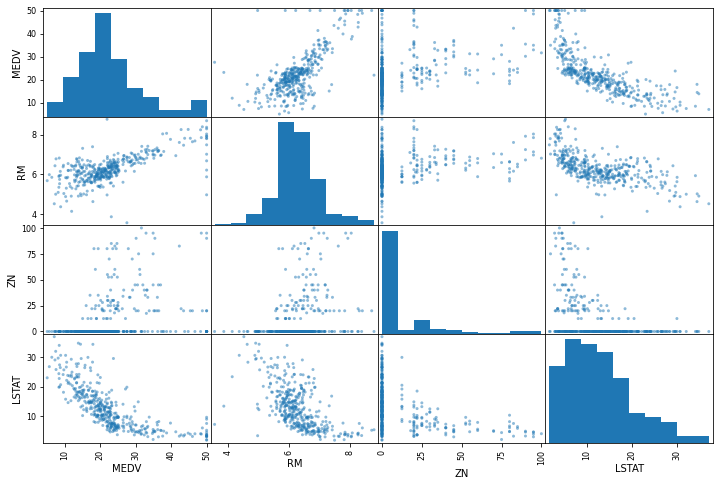

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
plot = scatter_matrix(housing[attributes], figsize = (12,8))


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

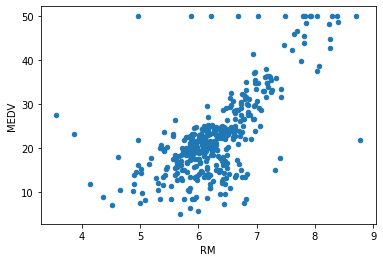

In [16]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV")

# Trying out Attribute Combinations

In [17]:
housing["TAXRM"] = housing['TAX']/housing['RM']
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [81]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

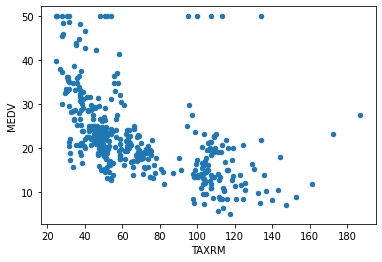

In [19]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV")

In [20]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()
# housing
# housing_labels

# Missing Attributes

In [21]:
# To Take Care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [22]:
# Option 1 which will remove all rows with any missing value
# a = housing.dropna(subset = ["RM"]) 
# a.shape

# Option 2 remove RM column
# housing.drop("RM", axis = 1)

# Option 3
# median = housing["RM"].median()
# housing["RM"].fillna(median)

In [23]:
housing.describe() # before imputting

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283947,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715882,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [26]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283106,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711467,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimtes some paramter based on a dataset. Eg; Imputer
it has a fit method adn transform method. Fit method - Fits the dataset and
calculates internal parameters


2. Transformers - transform method takes input and returns output based on the learning from fit(). It also has a c0nvenience function called fit_transfrom() which fits and then transforms.


3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions.It also gives score function which will evaluate the predictions.

# Feature Scaling

Two types of feature scaling methods

1. Min-Max scaling (Normalization)
    
    (value - min)/(max - min)
    
    from sklearn.preprocessing import MinMaxScaler
    
    
2. Standardization 
    (value - mean)/standard deviation
    
    scales them such that the distribution centered around 0, with a standard
    deviation of 1.
    
    from sklearn.preprocessing import StandardScaler

# Creating a Pipeline

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scalar', StandardScaler())
])

In [28]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [29]:
housing_num_tr.shape


(404, 13)

# Selecting a desired model for Real Estate

In [30]:
# pd.DataFrame(housing_num_tr, columns = housing.columns)


In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [32]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.96589227, 27.23244648, 20.57494764, 25.013337  , 23.72871106])

In [33]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

## LinearRegression

In [34]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())
    

In [35]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [36]:
lin_mse, lin_rmse

(23.375745791048743, 4.83484702871236)

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [38]:
print_scores(rmse_scores)

Scores :  [4.22862106 4.25935469 5.08003399 3.89455936 5.34869124 4.37943171
 7.4623039  5.49757109 4.14342825 6.07147762]
Mean :  5.036547290691585
Standard Deviation :  1.051551988578777


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse) 


In [40]:
mse, rmse  # overfitting so error is zero

(0.0, 0.0)

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [42]:
print_scores(rmse_scores)

Scores :  [3.952122   4.35114227 5.30866756 3.86194694 4.13696749 2.95
 5.0158748  3.89297444 3.41961255 4.27378638]
Mean :  4.116309441583139
Standard Deviation :  0.6556301163203071


# RandomForestRegressor()

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse) 


In [49]:
mse, rmse 

(1.4416249059405917, 1.2006768532542766)

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [51]:
print_scores(rmse_scores)

Scores :  [2.9329545  2.75239901 4.31335677 2.73696445 3.29412466 2.59234424
 4.78817902 3.38244343 3.32447086 3.03959178]
Mean :  3.31568287233035
Standard Deviation :  0.675775618393894


# Saving the Model


In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the Model

In [96]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
final_rmse, final_mse

(2.951999365667607, 8.714300254901955)